<a href="https://colab.research.google.com/github/KasiBaskerLaxmanan/pyalgotrading/blob/master/PricingAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = red>Pricing Analysis Using Python</font>
=======
<br>
    <center><img src="http://dataanalyticscorp.com/wp-content/uploads/2018/03/logo.png"></center>
<br>
Taught by: 

* Walter R. Paczkowski, Ph.D. 

    * My Affliations: [Data Analytics Corp.](http://www.dataanalyticscorp.com/) and [Rutgers University](https://economics.rutgers.edu/people/teaching-personnel)
    * [Email Me With Questions](mailto:walt@dataanalyticscorp.com)
    * [Learn About Me](http://www.dataanalyticscorp.com/)
    * [See My LinkedIn Profile](https://www.linkedin.com/in/walter-paczkowski-a17a1511/)
    * [My Books](https://www.amazon.com/-/e/B084KK4SF5?ref_=pe_1724030_132998070)

## Slide Set-up

This code sets up the presentation slides.

In [ ]:
##
## slide code
##
from IPython.display import Image
def slide(what):
    display( Image( "../Slides/PA_Page_" + what + ".png", width = 50, height = 50, retina = True ) )

## Contents

1. [**_Helpful Background_**](#Helpful-Background)
    1. [About this Notebook](#About-this-Notebook)
    2. [Helpful Online Tutorials](#Helpful-Online-Tutorials)
    3. [Helpful/Must-Read Books](#Helpful/Must-Read-Books)
2. [**_Lesson 0: Preliminary Stuff_**](#Lesson-0:-Preliminary-Stuff)
    1. [Load Python Packages](#Load-Python-Packages)
    2. [Set Data Path](#Set-Data-Path)
3. [**_Lesson I: Introduction_**](#Lesson-I:-Introduction) 
4. [**_Lesson II: Survey Approach to Pricing_**](#Lesson-II:-Survey-Approach-to-Pricing)
    1. [The Pricing Problem for Conjoint](#The-Pricing-Problem-for-Conjoint)
    2. [Analysis Steps for Conjoint](#Analysis-Steps-for-Conjoint)
    3. [The Setting for Conjoint](#The-Setting-for-Conjoint)
    4. [Conjoint Design Matrix Generation](#Conjoint-Design-Matrix-Generation)
    5. [Sample Card for Fielding Study](#Sample-Card-for-Fielding-Study)
    6. [Import the Responses](#Import-the-Responses)
    7. [Concatenate the Design Matrix and Responses](#Concatenate-the-Design-Matrix-and-Responses)
    8. [Estimate Part-worth Utilities](#Estimate-Part-worth-Utilities)
    9. [Calculate Attribute Importances](#Calculate-Attribute-Importances)
    10. [Calculate the Price Elasticities](#Calculate-the-Price-Elasticities)

5. [**_Lesson III: Transactions Data Approach to Pricing_**](#Lesson-III:-Transactions-Data-Approach-to-Pricing)
    1. [The Pricing Problem for Transactions](#The-Pricing-Problem-for-Transactions)
    2. [Import the Stores Data](#Import-the-Stores-Data)
    3. [Check the Data](#Check-the-Data)
    4. [Model Estimation I: Pooled Model](#Model-Estimation-I:-Pooled-Model)
        1. [Calculate the Price Elasticities: I](#Calculate-the-Price-Elasticities:-I)
    5. [Model Estimation II: Dummy Model](#Model-Estimation-II:-Dummy-Variable-Model)
        1. [Calculate the Price Elasticities: II](#Calculate-the-Price-Elasticities:-II)
    6. [Model Estimation III: Multilevel Model](#Model-Estimation-III:-Multilevel-Model)
6. [**_Summary and Wrap-Up_**](#Summary-and-Wrap-Up)
7. [**_Contact Information_**](#Contact-Information)
8. [**_Appendix: Extra Material_**](#Appendix:-Extra-Material)
    1. [Conjoint Analysis](#Conjoint-Analysis) 
        1. [Display Attribute Importances](#Display-Attribute-Importances)
        2. [Calculate Willingness-to-Pay (*WTP*)](#Calculate-Willingness-to-Pay)
    2. [Transactions Analysis](#Transactions-Analysis)
        1. [Check Distributions](#Check-Distributions)
        2. [Sales and Price Relationship](#Sales-and-Price-Relationship)
    

## Helpful Background

[Back to Contents](#Contents)


### About this Notebook

[Back to Contents](#Contents)

This notebook accompanies the PDF presentation **_Pricing Analysis Using Python_** by Walter R. Paczkowski, Ph.D. (2020).  There is more content and commentary in this notebook than in the presentation deck.  Nonetheless, the two complement each other and so should be studied together.  Every effort has been made to use the same key slide titles in the presentation deck and this notebook to help your learning.

### Helpful Online Tutorials

[Back to Contents](#Contents)

* <a href="http://docs.python.org/2/tutorial/" target="_parent">Python Tutorial</a>

* <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html" target="_parent">Pandas Tutorial</a>

* <a href="https://seaborn.pydata.org/tutorial.html" target="_parent">Seaborn Tutorial</a>

* <a href="https://www.statsmodels.org/stable/index.html" target="_parent">Statsmodels Tutorial</a>


### Helpful/Must-Read Books

[Back to Contents](#Contents)

* <a href="https://www.routledge.com/Pricing-Analytics-Models-and-Advanced-Quantitative-Techniques-for-Product/Paczkowski/p/book/9781138623934" target="_parent">Main Pricing go-to book: </a> *Pricing Analytics
Models and Advanced Quantitative Techniques for Product Pricing* (1st Edition) by Walter R. Paczkowski.

* <a href="https://www.amazon.com/gp/product/1491957662/ref=as_li_tl?ie=UTF8&tag=quantpytho-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1491957662&linkId=8c3bf87b221dbcd8f541f0db20d4da83" target="_parent">Main Pandas go-to book: </a> *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd Edition) by Wes McKinney.

## Lesson 0: Preliminary Stuff

[Back to Contents](#Contents)

### Load Python Packages

[Back to Contents](#Contents)

You have to load a Python package before you can use it.  Loading is done using an *import* command.  An alias is assigned when you import the package.  I recommend loading all the packages at once at the beginning of your notebook.

In [ ]:
##
## ===> Data Management <===
##
import numpy as np
import pandas as pd
##
## ===> Visualization <===
##
import seaborn as sns
import matplotlib.pyplot as plt
##
## ===> Modeling <===
##
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_col
##
from patsy.contrasts import Sum
##
## ===> Hypothesis Testing <===
##
from scipy.stats import skewtest
##
## ===> Experimental Design <===
##
import random
random.seed( 42 )
!pip install pyDOE2
import pyDOE2
##
## ===> Preprocessing <===
##
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-cp36-none-any.whl size=25519 sha256=5ff77582f3eeb1983357232a6ef233c177d70434a28da50151dca40ae4b9e11f
  Stored in directory: /root/.cache/pip/wheels/60/88/1d/b334ee00dd83e82d111ec56c3be91573d335c93870698037f1
Successfully built pyDOE2


**_Code Explanation_**

This code block loads the necessary Python packages for this course.  

In [ ]:
##
## Run if needed to install pyDOE2.
## Removing the ## at the beginning of the last line.
##
##!pip install -q pyDOE2

### Set Defaults

In [ ]:
##
## Default formats
##
font_title = 20
format = '{:0.1%}'
format_dollar = '${:,.2f}'
p_value = '{:0.4f}'
##
## DataFrame styles
##
tbl_styles = [ {
    'selector': 'caption',
    'props': [
        ('color', 'red'),
        ('font-size', '18px')
    ] } ]
##
## Misc functions for graphs
##
def footer():
    ax.annotate( base, ( 0, 0 ), ( 0, -0.3 ), xycoords = 'axes fraction' )
def tick_labels( tick ):
    if tick == 'y':
        vals = ax.get_yticks()
        ax.set_yticklabels( format.format( x ) for x in vals )
    else:
        vals = ax.get_xticks()
        ax.set_xticklabels( format.format( x ) for x in vals )

### Set Data Path

[Back to Contents](#Contents)

It is best practice to define paths in one location.  This makes error finding and changes easier.

In [ ]:
##
## Set data path.
##
path = '../Data/'

## Lesson I: Introduction

[Back to Contents](#Contents)

A *pricing strategy* has two parts:

1. **Price Structure**: How prices are delivered -- uniformly or discriminatorily.

    > Example: A high price at the beginning of a fashion season and a low price at the end to target consumers based on their price sensitivities or *elasticities*.

2. **Price Level**: The price point actually charged.


Just as important as the price level is the price *effect*.  All too often, managers just think of "stimulating demand" by lowering the price.  This is too narrow and simplistic -- and dangerous.

**Think More Broadly**

> *What is the effect of a different price structure and/or level on a key business metric (*KBM*)* such as:
> 1. Revenue?
> 2. Bid win?
> 3. Contribution?
> 4. Customer acquisition?
> 5. Customer retention?
> 6. Market share?

This is where *price elasticities* become important.

In [ ]:
slide( '08' )

There are two approaches to developing elasticities:

1. Survey-based

    1. Conjoint
	2. Discrete choice
	3. Granger-Gabor
	4. van Westendorp Price Sensitivity Meter

2. Transactions-based

    1. Regression modeling

I will illustrate both approaches with:

- Conjoint analysis
- Transactions regression analysis


## Lesson II: Survey Approach to Pricing

[Back to Contents](#Contents)

I will illustrate a survey approach to pricing using a Conjoint study.  This is just one of several survey approaches.  Others are:

> 1. Discrete Choice
> 2. MaxDiff
> 3. Granger-Gabor
> 4. Von Westendorf Price Sensitivity Meter

The Conjoint approach is used to illustrate what can be done using Python.

### The Pricing Problem for Conjoint

[Back to Contents](#Contents)

A watch manufacturer wants to develop and price a new men's fitness watch.  	She can only market one product.  There are four *features*, *factors*, or *attributes*} that define the watch:

> - **Price**: \$149.99, \$179.99, \$229.99.
> - **Compatibility**: Android, iOS, Windows.
> -	**Measure**: Calories, Distance, Heart Rate.
> - **Rain/Splash Proof**: Yes, No.

There are 54 possible watches based on these attributes.

**Problem**

> <font color = red>***What is the best watch to sell and at what price?***</font>

A model is needed to answer this question.  This is a conjoint model.  A conjoint model is one member of a family of *choice models*.

### Analysis Steps for Conjoint

[Back to Contents](#Contents)

1. Identify the product's attributes and their levels.
2. Create a design matrix of the attributes and their levels.
3. Field the study and collect responses.
4. Create a data matrix for estimation and estimate a model.
5. Analyze the results:
    1. Attribute importances.
    2. Elasticities.

### The Setting for Conjoint

[Back to Contents](#Contents)

> **Factors and levels for a new watch**:

- Compatibility: Android, iOS, Windows
- Measure: Calories, Distance, Heart Rate
- Price: \\$149.99, \\$179.99, \\$229.99 
- Rain/Splash Proof: No, Yes

> **Total number of combinations**:

$Combinations = 3 \times 3 \times 3 \times 2 = 54$

> **Parameters needed for this problem**:

| Attributes          | Number of Levels | Parameters Needed |
|---------------------|------------------|-------------------|
| Compatibility       | 3                | 2                 |
| Measure             | 3                | 2                 |
| Price		          | 3                | 2                 |
| Rain/Splash Proof   | 2                | 1                 |
| Sub Total           | 11               | 7                 |
| Constant            |                  | 1                 |
| Minimum Runs Needed |                  | 8                 |


In [ ]:
##
## Create a design dictionary for future use
##
att = [ 'Compatibility', 'Measure', 'Price', 'Rain/Splash Proof' ]
dt_att = { 'compat':'Compatible', 'measure':'Measure', 'price':'Price', 'rain':'Rain' }
dt = {
    'compat': { 0:'Android', 1:'iOS', 2:'Windows' },
    'measure': { 0:'Calories', 1:'Heart Rate', 2:'Distance' },
    'price': { 0:'$149.99', 1:'$179.99', 2:'$229.99' },    
    'rain': { 0:'No', 1:'Yes' }
    }
##
## Retrieve number of levels of each attribute
##
levels = [ len( list( value ) ) for value in dt.values() ]
##
## Print summary
##
print( 'Design Summary:\n' )
print( '\nAttributes:\n{}'.format( list( dt.keys() ) ) )
print( '\nLevels:\n{}'.format( levels ) )
print( '\nAttribute mappings:\n{}'.format( dt_att ) )
print( '\nDictionary of attributes:\n{}'.format( dt ) )

Design Summary:


Attributes:
['compat', 'measure', 'price', 'rain']

Levels:
[3, 3, 3, 2]

Attribute mappings:
{'compat': 'Compatible', 'measure': 'Measure', 'price': 'Price', 'rain': 'Rain'}

Dictionary of attributes:
{'compat': {0: 'Android', 1: 'iOS', 2: 'Windows'}, 'measure': {0: 'Calories', 1: 'Heart Rate', 2: 'Distance'}, 'price': {0: '$149.99', 1: '$179.99', 2: '$229.99'}, 'rain': {0: 'No', 1: 'Yes'}}


### Conjoint Design Matrix Generation

[Back to Contents](#Contents)

A *design matrix* must be generated.  Use the ***pyDOE2*** package.

In [ ]:
##
## Generate the conjoint design with 18 ( = 54/3 ) runs
##
fraction = 3                             ## One-third fraction
design = pyDOE2.gsd( levels, fraction )  ## Reduce the number of experiment to approximately a third.
print( 'Design with: ' + str( design.shape[ 0 ] ) + ' rows and ' + str( design.shape[ 1 ] ) + ' columns' )

Design with: 18 rows and 4 columns


In [ ]:
##
## Create DataFrame for the design matrix
##
## ===> Step 1: Create column names using list 
##              comprehension on the design dictionary
##
colnames =  [ key for key in dt.keys() ]
##
## ===> Step 2: Create DataFrame
##
df_design = pd.DataFrame( design, columns = colnames )
df_design.head().style.set_caption( 'Conjoint Matrix' ).\
set_table_styles( tbl_styles ).\
hide_index()

compat,measure,price,rain
0,0,0,0
0,0,1,1
0,1,0,1
0,1,2,0
0,2,1,0


### Sample Card for Fielding Study

[Back to Contents](#Contents)

This is what you might show consumers.

In [ ]:
## 
## Recode design matrix with labels
##
n = df_design.shape[ 1 ]  ## number of columns
for i in range( n ):
    x = colnames[ i ]
    df_design[ x ] = df_design[ x ].replace( dt[ x ] )
##
df_design.head().style.set_caption( 'Recoded Design Matrix' ).\
set_table_styles( tbl_styles ).\
hide_index()

compat,measure,price,rain
Android,Calories,$149.99,No
Android,Calories,$179.99,Yes
Android,Heart Rate,$149.99,Yes
Android,Heart Rate,$229.99,No
Android,Distance,$179.99,No


In [ ]:
##
## Sample card shown to a consumer
##
lst = df_design.query( 'index == 0' ).values.tolist()[ 0 ]
n = len( lst )
msg = ("On a scale from 0 to 10, where '0' means you definitely will not buy this watch and '10' means{sep}"
       "you definitely will buy it, you may use any number between 0 and 10, please indicate your{sep}"
       "likelihood of buying the following watch.").format( sep = '\n' ) 
print( '-'*95 )
print( msg )
for i in range( n ):
    print( '\n\t' + att[ i ] + ': {}'.format( lst[ i ] ) )
print( '-'*95 )
print( '\t0\t1\t2\t3\t4\t5\t6\t7\t8\t9\t10')
print( '-'*95 )
print( "   Will Not Buy\t\t\t\t\t\t\t\t\t     Will Buy" )

-----------------------------------------------------------------------------------------------
On a scale from 0 to 10, where '0' means you definitely will not buy this watch and '10' means
you definitely will buy it, you may use any number between 0 and 10, please indicate your
likelihood of buying the following watch.

	Compatibility: Android

	Measure: Calories

	Price: $149.99

	Rain/Splash Proof: No
-----------------------------------------------------------------------------------------------
	0	1	2	3	4	5	6	7	8	9	10
-----------------------------------------------------------------------------------------------
   Will Not Buy									     Will Buy


### Import the Responses

[Back to Contents](#Contents)

The collected data are in a *CSV* file.  An *SPSS* file is also possible, especially if an online survey tool is used.  For my example, the data are in a *CSV* file.

In [ ]:
##
## Import responses from CSV file
##
df_responses = pd.read_csv( '/content/responses.csv' )
df_responses.head( ).style.set_caption( 'Responses with ID and Set Indicators' ).\
format( { 'response':'{:.0f}' } ).\
set_table_styles( tbl_styles ).\
hide_index()

ID,set,response
1,1,6
1,2,6
1,3,6
1,4,4
1,5,6


In [ ]:
##
## Check response DataFrame counts
##
print( 'Number of rows: {rows}\nNumber of columns: {cols}'.format( 
        rows = df_responses.shape[ 0 ], cols = df_responses.shape[ 1 ] ) )
##
## Record the number of respondents
##
n_respondents = df_responses.ID.nunique()
print( '\nNumber of unique respondents: {}'.format( n_respondents ) )

Number of rows: 6930
Number of columns: 3

Number of unique respondents: 385


### Concatenate the Design Matrix and Responses

[Back to Contents](#Contents)

The design matrix and the responses have to be joined or merged.

In [ ]:
##
## Replicate the design matrix to match the number of respondents
##
n_respondents = df_responses.ID.nunique()
for i in range( n_respondents ):
    if i == 0:
        tmp = df_design
    else:
        tmp = pd.concat( [ tmp, df_design], ignore_index = True ) 
##
## Attach ID and Set Number to the replicated design matrix
##
## Set some parameters
##
n = n_respondents + 1
runs = df_design.shape[ 0 ]
##
tmp[ 'ID' ] = [ x for x in range( 1, n ) for i in range( runs ) ] 
tmp[ 'set' ] = [item for x in [ range( 1, runs + 1 ) for  i in range( 1, n ) ] for item in x ]
##
## Remove dollar sign from price and set type to float
##
tmp.price = tmp.price.str.replace( '$', '' ).astype( float )
##
## Merge the design and response DataFrames on ID and Set
##
df_conjoint =  pd.merge( df_responses, tmp, on = [ 'ID', 'set' ] )
df_conjoint.head().style.set_caption( 'Merged Conjoint DataFrame' ).\
format( { 'response':'{:.0f}', 'price':'{:.2f}' } ).\
set_table_styles( tbl_styles ).\
hide_index()

ID,set,response,compat,measure,price,rain
1,1,6,Android,Calories,149.99,No
1,2,6,Android,Calories,179.99,Yes
1,3,6,Android,Heart Rate,149.99,Yes
1,4,4,Android,Heart Rate,229.99,No
1,5,6,Android,Distance,179.99,No


### Estimate Part-worth Utilities

[Back to Contents](#Contents)


The model is for the total preference or *total utility* for combinations of attributes of a product concept.  Total utility is composed of pieces called *part-worths*, each part-worth measuring the contribution of each attribute's level.	

The goal is to estimate these part-worth utilities enabling the calculation of total utility for each of the 54 watches.

Ordinary least squares (*OLS*) regression can be used for estimation.

In [ ]:
##
## Follow four steps to estimate a model
##
## ===> Step 1: Specify the model formula <===
##
## The Sum() function results in an effects coding 
## for the categorical variable
##
formula = "np.log( response ) ~ np.log(price) + \
C(compat, Sum( 'Windows' ) ) + \
C(measure, Sum( 'Heart Rate' ) ) + \
C(rain, Sum( 'No' ) )"
##
## ===> Step 2: Instantiate the model <===
##
mod = smf.ols( formula, data = df_conjoint )
##
## ===> Step 3: Fit the model <===
##
reg01 = mod.fit()
##
## ===> Step 4: Summarize the model <===
##
print(reg01.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(response)   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2350.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:51:31   Log-Likelihood:                 483.67
No. Observations:                6930   AIC:                            -953.3
Df Residuals:                    6923   BIC:                            -905.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**Code Explanation**

The *formula* step uses the "C" function to indicate that the categorical variable, *compat*, must be encoded.  The *Sum( 'Windows' )*  argument says to use *effects coding* so that the sum of the estimated coefficients for *compat* levels add to zero (including the omitted level).  The omitted level is the base which is specified as *Windows*.
<br><br>
The Numpy *log* function is used to take the (natural) log of price.

**Interpretation**

The estimated coefficient for the log-Price is the price elasticity.  This will used below.

In [ ]:
##
## Retrieve the part-worths
##
x = reg01.params[ 1:7 ]
part_worths = [ x[ i ] for i in range( len( x ) ) ]
##
## Put into a DataFrame with labels
##
df_pw = pd.DataFrame( part_worths, columns = [ 'Part-Worth' ], index = x.index )
df_pw.style.set_caption( 'Estimated Part-Worths' ).\
set_table_styles( tbl_styles ).\
format( '{:.4f}' )

,Part-Worth
"C(compat, Sum('Windows'))[S.Android]",-0.0422
"C(compat, Sum('Windows'))[S.iOS]",-0.0826
"C(measure, Sum('Heart Rate'))[S.Calories]",-0.1976
"C(measure, Sum('Heart Rate'))[S.Distance]",0.2496
"C(rain, Sum('No'))[S.Yes]",0.0808
np.log(price),-1.3320


## Calculate Attribute Importances

[Back to Contents](#Contents)

Calculate attribute importances.  The importance of an attribute is the range of the attribute divided by the total range of all attributes.

In [ ]:
##
## Retrieve and clean part-worth index for attributes
##
lst_att = [ i.split( 'C(' )[ 1 ].split( ',' )[ 0 ] for i in df_pw.index[ 0:-1 ] ]
lst_level = [ i.split( 'S.' )[ 1 ].split( ']' )[ 0 ] for i in df_pw.index[ 0:-1 ] ]
lst_att.append( 'Price' )
lst_level.append( 'log_Price' )
##
## Add attribute list to part-wroth DataFrame
##
df_pw[ 'att' ] = lst_att
df_pw[ 'level' ] = lst_level
##
## Calculate dropped values
##
grp = pd.DataFrame( df_pw.groupby( 'att' )[ 'Part-Worth' ].sum()*( -1 ) )
grp.reset_index( inplace = True )
##
## Add dropped levels to base
##
data = pd.concat( [ df_pw, grp ], axis = 0, sort = False, ignore_index = True )
data.replace( { 'att':dt_att }, inplace = True )
data.sort_values( by = [ 'att', 'level' ], inplace = True )
##
## Calculate importances
##
grp = data.groupby( 'att' ).apply( lambda x: x[ 'Part-Worth' ].max() - x[ 'Part-Worth' ].min() )
df_importances = pd.DataFrame( grp/grp.sum(), columns = [ 'Importance' ] )
df_importances.rename_axis( 'Attribute', inplace = True )
df_importances.sort_values( by = [ 'Importance' ], ascending = False, inplace = True )
##
df_importances.style.set_caption( 'Attribute Importances' ).\
set_table_styles( tbl_styles ).\
bar( align = 'mid' ).format( '{:.1%}' )

,Importance
Attribute,
Price,76.5%
Measure,12.8%
Compatible,6.0%
Rain,4.6%


**Code Explanation**

The base level of each attributed can be retrieved as the negative of the sum of the etsimated coefficients for an attribute.  This is an advantage of effects coding.

**Interpretation**

Price is the most important attribute for the watches.

## Calculate the Price Elasticities

[Back to Contents](#Contents)

There are two elasticities: price and revenue.  The revenue elasticity equals $1 + \eta$ where $\eta$ is the price elasticity.

In [ ]:
##
## Retrieve estimated price parameter
##
eta = df_pw.query( 'att == "Price"' )[ 'Part-Worth' ][ 0 ]
##
## The revenue elasticity is 1 + price elasticity
##
eta_rev = 1 + eta
##
## Put in DataFrame for display
##
df_elas = pd.DataFrame( [ eta, eta_rev ], columns = [ 'Elasticities'], 
    index = [ 'Price Elasticity', 'Revenue Elasticity' ] )
df_elas.style.set_caption( 'Elasticity Summary').\
set_table_styles( tbl_styles ).\
format( '{:.1f}' )

,Elasticities
Price Elasticity,-1.3
Revenue Elasticity,-0.3


In [ ]:
slide( '17' )

**Code Explanation**

The Pandas *query* method was used to subset the data for the Price attribute.

**Interpretation**

Watches are highly elastic.  A 1% increase in price will result in a 1.3% decrease in take.  Revenue will fall 0.3%.

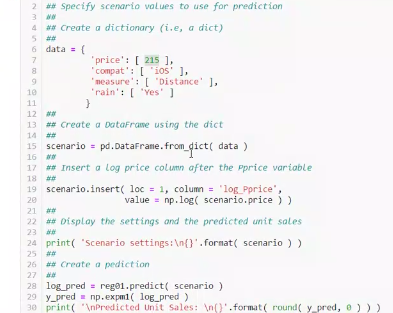

## Lesson III: Transactions Data Approach to Pricing

[Back to Contents](#Contents)

Price elasticities and price points are often determined using transactions data.  The data could be in a data warehouse or data mart.

### The Pricing Problem for Transactions

[Back to Contents](#Contents)

Fictional data on a retail chain in New England states.

- One consumer product
- Six stores
  - 3 Urban (Small)
  - 3 Suburban (Large)
- 600 consumers
  - Each consumer's purchases and prices averaged to one annual number so $n = 600$.
- Consumer data:
  - Average price paid
  - Household income
  - Average purchase size

#### **Pricing Conjecture**

The store location impacts pricing: *Urban stores are more elastic because of more intense competition, so a lower price point should be used*.  

### Import the Stores Data

[Back to Contents](#Contents)

In [ ]:
df = pd.read_csv('/content/stores.csv' )
##
## Insert underscore in column name if it
## has an internal whitespace.  This will make
## using names easier.
##
cols = df.columns
cols = [ x.replace( ' ', '_' ) for x in cols ]
df.columns = cols
df.head().style.set_caption( 'Stores Transactions Data' ).\
set_table_styles( tbl_styles ).\
hide_index()

store_ID,location,size,size_group,price,income,quantity,log_Price,log_Income,log_Quantity,log_Size,Interaction
3,Urban,1089,Mid-Size,1.760000,93,181,0.565314,4.532599,5.198497,6.993015,0.000000
3,Urban,1089,Mid-Size,1.820000,91,202,0.598836,4.510860,5.308268,6.993015,0.000000
3,Urban,1089,Mid-Size,1.910000,82,132,0.647103,4.406719,4.882802,6.993015,0.000000
3,Urban,1089,Mid-Size,1.890000,77,115,0.636577,4.343805,4.744932,6.993015,0.000000
3,Urban,1089,Mid-Size,1.790000,91,158,0.582216,4.510860,5.062595,6.993015,0.000000


In [ ]:
##
## Check DataFrame counts
##
print( 'Number of rows: {rows}\nNumber of columns: {cols}'.format( 
        rows = df.shape[ 0 ], cols = df.shape[ 1 ] ) )

Number of rows: 600
Number of columns: 12


### Check the Data

[Back to Contents](#Contents)

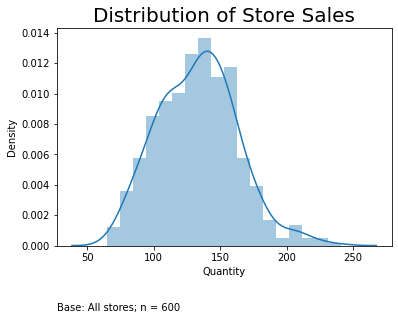

In [ ]:
##
## Check distribution of sales
##
base = 'Base: All stores; n = ' + str( df.shape[ 0 ] )
ax = sns.distplot( df.quantity )
ax.set_title( 'Distribution of Store Sales', fontsize = font_title )
ax.set( xlabel = 'Quantity', ylabel = 'Density' )
footer();

**Interpretation**

There seems to be some slight right skewness in the sales data.  Right skewness is typical for sales (and price) data.  You can test the skewness against the Normal Distribution.  The skewness for the Normal is zero because the distribution is symmetric about the mean.  So the Null Hypothesis for the test is that the skewness of the sales data is the same as that for the Normal Distribution: zero.  A Z-test is done. 

In [ ]:
##
## Test skewness
##
sk = skewtest( df.quantity )
print( 'Z-score: {z}\np-Value: {p}'.format( z = round( sk[ 0 ], 3 ), p = round( sk[ 1 ], 4 ) ) )

Z-score: 2.953
p-Value: 0.0031


**Interpretation**

A positive Z-score indicates right-skewness which agrees with what we observed.  The p-value is less than 0.05 so we reject the Null Hypthesis of zero skewness.  
<br>
How do we fix the skewness?  Taking the natural log of the data is the usualy fix.

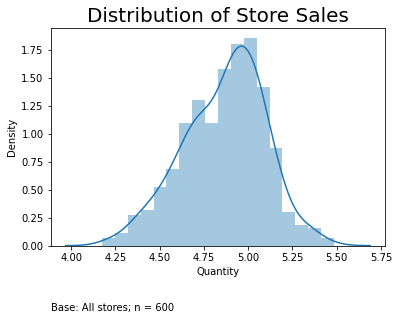

In [ ]:
##
## Distribution based on natural log
##
base = 'Base: All stores; n = ' + str( df.shape[ 0 ] )
ax = sns.distplot( df.log_Quantity )
ax.set_title( 'Distribution of Store Sales', fontsize = font_title )
ax.set( xlabel = 'Quantity', ylabel = 'Density' )
footer();

### Types of Models
  
There are three types of models we can consider:

> - **Pooled**:Use all the data in one model.
> - **Dummy Variable**: Segment the data by store size with dummies.
> - **Multilevel**: Account for the hierarchical structure of stores.

In [ ]:
slide( '24' )

### Model Estimation I: Pooled Model

[Back to Contents](#Contents)

Pool all the data into one model without regard for store location.

In [ ]:
## 
## OLS
##
## There are four steps for estimatng a model:
##
##   1. define a formula (i.e., the specific model to estimate)
##   2. instantiate the model (i.e., specify it)
##   3. fit the model
##   4. summarize the fitted model
##
## ===> Step 1: Define a formula <===
##
## The formula uses a “~” to separate the left-hand side from the right-hand side
## of a model and a “+” to add columns to the right-hand side.  A “-” sign (not 
## used here) can be used to remove columns from the right-hand side (e.g.,
## remove or omit the constant term which is always included by default). 
##
formula = 'log_Quantity ~ log_Price + log_Income'
##
## ===> Step 2: Instantiate the OLS model <===
##
mod = smf.ols( formula, data = df )
##
## ===> Step 3: Fit the instantiated model <===
##      Recommendation: number your fitted models
##
reg01 = mod.fit() 
##
## ===> Step 4: Summarize the fitted model <===
##
print( reg01.summary() )


                            OLS Regression Results                            
Dep. Variable:           log_Quantity   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     145.8
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.77e-52
Time:                        15:07:53   Log-Likelihood:                 146.37
No. Observations:                 600   AIC:                            -286.7
Df Residuals:                     597   BIC:                            -273.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6771      0.287     19.812      0.0

#### Calculate the Price Elasticities: I

[Back to Contents](#Contents)

Since this is a log-log model, the price elasticity is just the estimated parameter for log-Price.

In [ ]:
##
## Retrieve the coefficient for log-Price as the elasticity
##
eta = reg01.params.log_Price
##
## The revenue elasticity is 1 + price elasticity
##
eta_rev = 1 + eta
##
## Put in DataFrame for display
##
df_elas = pd.DataFrame( [ eta, eta_rev ], columns = [ 'Elasticities'], 
    index = [ 'Price Elasticity', 'Revenue Elasticity' ] )
df_elas.style.set_caption( 'Elasticity Summary').\
set_table_styles( tbl_styles ).\
format( '{:.1f}' )

,Elasticities
Price Elasticity,-2.4
Revenue Elasticity,-1.4


**Interpretation**

Demand is highly elastic, but this pooled model does not allow us to check the Conjecture so we do not know how the elastcity varies by store location.

In [ ]:
slide( '28' )

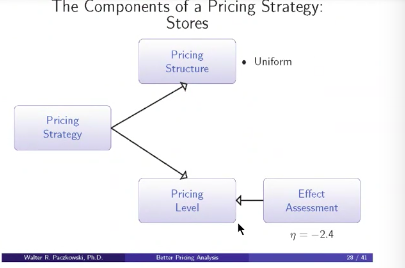

### Model Estimation II: Dummy Variable Model

[Back to Contents](#Contents)

Include a dummy variable for the store location: Urban or Suburban.

In [ ]:
## 
## OLS
##
## There are four steps for estimatng a model:
##
##   1. define a formula (i.e., the specific model to estimate)
##   2. instantiate the model (i.e., specify it)
##   3. fit the model
##   4. summarize the fitted model
##
## ===> Step 1: Define a formula <===
##
## The formula uses a “~” to separate the left-hand side from the right-hand side
## of a model and a “+” to add columns to the right-hand side.  A “-” sign (not 
## used here) can be used to remove columns from the right-hand side (e.g.,
## remove or omit the constant term which is always included by default). 
##
formula = 'log_Quantity ~ log_Price + log_Income + C(location) + log_Price*C(location)'
##
## ===> Step 2: Instantiate the OLS model <===
##
mod = smf.ols( formula, data = df )
##
## ===> Step 3: Fit the instantiated model <===
##      Recommendation: number your fitted models
##
reg02 = mod.fit() 
##
## ===> Step 4: Summarize the fitted model <===
##
print( reg02.summary() )


                            OLS Regression Results                            
Dep. Variable:           log_Quantity   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.02e-82
Time:                        15:10:24   Log-Likelihood:                 221.75
No. Observations:                 600   AIC:                            -433.5
Df Residuals:                     595   BIC:                            -411.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Calculate the Price Elasticities: II

[Back to Contents](#Contents)

In [ ]:
##
## Retrieve estimated parameters
##
x = pd.DataFrame( reg02.params, columns = [ 'part_worth' ] )
print( x )
##
## Calculate the price elasticities
##
eta_urban = sum( x.part_worth[ [ 2, 3 ] ] )
eta_rural = x.part_worth[ 2 ]
##
## Calculate the revenue elasticities: 1 + price elasticity
##
eta_rev_urban = 1 + eta_urban
eta_rev_rural = 1 + eta_rural
##
## Put in DataFrame for display
##
eta = [ [ eta_urban, eta_rev_urban ], [ eta_rural, eta_rev_rural ]]
cols = pd.MultiIndex.from_product( [ [ 'Elasticity' ], [ 'Price', 'Revenue' ] ] )
idx = [ 'Urban', 'Rural' ]
df_elas = pd.DataFrame( eta, index = idx, columns = cols )
df_elas.index.rename( 'Location', inplace = True )
df_elas.style.set_caption( 'Elasticity Summary').\
set_table_styles( tbl_styles ).\
format( '{:.2f}' )

                                part_worth
Intercept                         1.922160
C(location)[T.Urban]              0.795616
log_Price                        -0.613992
log_Price:C(location)[T.Urban]   -0.594586
log_Income                        0.657544


**Interpretation**

Urban stores are more elastic which supports the Conjecture.

In [ ]:
slide( '33' )

### Model Estimation III: Multilevel Model

[Back to Contents](#Contents)

This is more complex -- it requires a separate course.

#### Data Structures

There are two data structures: *Non-Nested* and *Nested* or *Multilevel*.

**Definition**
  *Non-nested Data*: The data in the population are at the same level.

>**Example**
		> - All consumers in a random sample are the same.  Their behavior is driven solely by their traits -- and the prices they see.

**Definition**
  *Nested/Multilevel Data*: The data in the population are hierarchical.

>**Examples**
  > - Consumers shopping in a store.
  > - Households in a marketing region.

#### Marketing and Pricing Examples

Examples of hierarchical structures are more common in marketing and pricing than thought:

> - Segments
> - Stores
> - Marketing regions
> - States
> - Neighborhoods
> - Organization membership
> - Brand loyalty

Many more could be listed.

#### Use of Multilevel Modeling

A multilevel model allows a more detailed/finer analysis for the Conjecture.  Specifically: *What determines the elasticities*?

This type of modeling is more complex -- so it is another course.


## Summary and Wrap-Up

[Back to Contents](#Contents)

In this course, we covered:

> - How to use a survey to collect data for pricing.
> - How to estimate on survey-based model -- conjoint -- for pricing.
>   - Conjoint is one member of a family of choice models.
> - How to use transactions data for pricing.
>   - There is a hierarchical structure to models.


## Contact Information

[Back to Contents](#Contents)

In [ ]:
slide( '41' )

## Appendix: Extra Material

[Back to Contents](#Contents)

### Conjoint Analysis

[Back to Contents](#Contents)

#### Display Attribute Importances

[Back to Contents](#Contents)

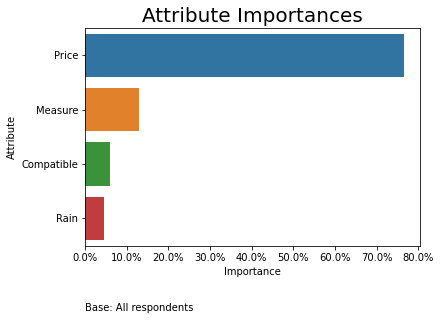

In [ ]:
##
## Display a barchart of the importances
##
base = 'Base: All respondents'
ax = sns.barplot( x = 'Importance', y = df_importances.index, data = df_importances,
                order = df_importances.index )
ax.set_title( 'Attribute Importances', fontsize = font_title )
ax.set( ylabel = 'Attribute')
tick_labels( 'x' )
footer();

#### Calculate Willingness to Pay

[Back to Contents](#Contents)

Willingness-to-Pay (*WTP*) is calculated using the formula:

$𝑊𝑇𝑃 = \dfrac{− \beta_{𝐴𝑡𝑡𝑟𝑖𝑏𝑢𝑡𝑒~𝐿𝑒𝑣𝑒𝑙}}{\beta_{𝑃𝑟𝑖𝑐𝑒}}$

It is help/informative to know how mcu each consumer will pay extra for a difference level of each attribute.  This willingness-to-pay (*WTP*) for a level is relative to the base level in the effects coding.  See <a href="https://www.routledge.com/Pricing-Analytics-Models-and-Advanced-Quantitative-Techniques-for-Product/Paczkowski/p/book/9781138623934" target="_parent">here </a> for the formula derivation and a discussion of *WTP*.

In [ ]:
##
## Calculate WTP
##
beta_price = df_pw.query( 'att == "Price"' )[ 'Part-Worth' ][ 0 ]
##
lst_att = df_pw.att
lst_level = df_pw.level
lst_tups = list( zip( lst_att, lst_level ) )
lst_tups = lst_tups[ : -1 ]
n = len( lst_tups )
##
## Loop through part-worths
##
lst_wtp = []
for i in range( n ):
    att_what = lst_att[ i ]
    level_what = lst_level[ i ]
    beta = df_pw.query( ' att == @att_what and level == @level_what ' )[ 'Part-Worth' ][ 0 ]
    wtp = ( -1 ) * beta/beta_price
    lst_wtp.append( wtp )
##
## Create summary DataFrame
##
index = pd.MultiIndex.from_tuples( lst_tups, names=[ 'Attribute', 'Level' ] )    
df_wtp = pd.DataFrame( lst_wtp, columns = [ 'WTP' ], index = index )
df_wtp.style.set_caption( 'WTP Summary' ).format( {'WTP':format_dollar} )

**Interpretation**

The Distance measure has the largest *WTP*.  Consumers are willing to pay $0.19 more for the distance measure than the base Heart Monitoring measure.

### Transactions Analysis

[Back to Contents](#Contents)

#### Check Distributions

[Back to Contents](#Contents)

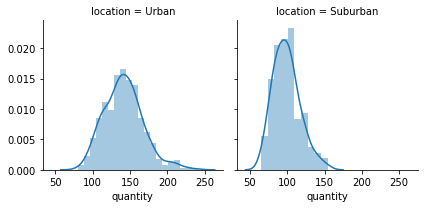

In [ ]:
##
## Check distribution of sales by location
##
base = 'Base: All stores; n = ' + str( df.shape[ 0 ] )
g = sns.FacetGrid( df, col = "location", margin_titles = True )
g.map( sns.distplot, "quantity" )
footer();

In [ ]:
##
## Test for skewness for Suburban stores
##
x = df.query( 'location == "Suburban"' )
sk = skewtest( x.quantity )
print( 'Z-score: {z}\np-Value: {p}'.format( z = round( sk[ 0 ], 3 ), p = round( sk[ 1 ], 4 ) ) )

Z-score: 2.608
p-Value: 0.0091


In [ ]:
##
## Test for skewness for Urban stores
##
x = df.query( 'location == "Urban"' )
sk = skewtest( x.quantity )
print( 'Z-score: {z}\np-Value: {p}'.format( z = round( sk[ 0 ], 3 ), p = round( sk[ 1 ], 4 ) ) )

Z-score: 4.404
p-Value: 0.0


#### Sales and Price Relationship

[Back to Contents](#Contents)

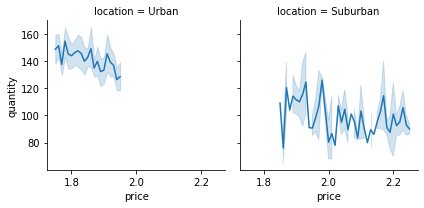

In [ ]:
##
## Graph relationship of sales by price for locations
##
base = 'Base: All stores; n = ' + str( df.shape[ 0 ] )
g = sns.FacetGrid( df, col = "location", margin_titles = True )
g.map( sns.lineplot, 'price', 'quantity' );

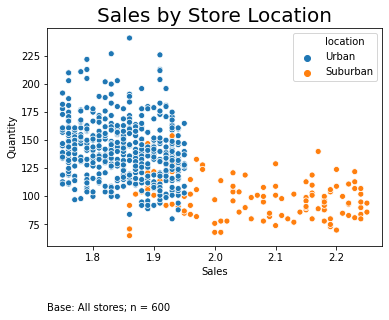

In [ ]:
##
## Graph relationship of sales by price for locations
##
base = 'Base: All stores; n = ' + str( df.shape[ 0 ] )
ax = sns.scatterplot( y = 'quantity', x = 'price', hue = 'location', data = df )
ax.set_title( 'Sales by Store Location', fontsize = font_title )
ax.set( ylabel = 'Quantity', xlabel = 'Sales' )
footer();